1. Import required modules

In [1]:
import pandas as pd
from import_data import load_input_tables 
from mohrs_3D_v2 import mohrs_3D_v2
from ppfail_MC import ppfail_MC_all

2. Load input tables and helper functions

In [2]:
# Load tables
params_row, faults_df = load_input_tables("Params Input Table.csv", "Faults Input Table.csv")

# Helper function to initialize parameters
def get_param(name):
    value = params_row.get(name)
    return value if pd.notna(value) else faults_df[name].values

3. Initialize Data

In [3]:
# Initialize data
strike = faults_df["strike"].values
dip = faults_df["dip"].values
mu = get_param("mu")
SHmax_or = get_param("SHmax_or")
Pp = get_param("Pp")
APhi = get_param("Aphi")
Sv_grad = get_param("Sv_grad")
SHmax_mag = get_param("SHmax_mag")
Shmin_mag = get_param("Shmin_mag")
ref_mu = get_param("ref_mu")
name = get_param("name")

In [4]:
print(params_row)

{'units': 'SI', 'ref_mu': 3, 'Sv_grad': 25, 'Sv_grad_dist': 'normal', 'Sv_grad_param': 0.01, 'mu': 0.6, 'mu_dist': 'normal', 'mu_param': 0.05, 'strike_dist': 'normal', 'strike_param': 5, 'dip_dist': 'uniform', 'dip_param': 35, 'Pp': 10, 'Pp_dist': 'normal', 'Pp_param': 0.5, 'SHmax_or': 70, 'SHmax_or_dist': 'normal', 'SHmax_or_param': 10, 'Aphi': 1.72, 'Aphi_dist': 'normal', 'Aphi_param': 0.15, 'SHmax_mag': nan, 'SHmax_mag_dist': nan, 'SHmax_mag_param': nan, 'Shmin_mag': nan, 'Shmin_mag_dist': nan, 'Shmin_mag_param': nan}


In [5]:
pd.set_option('display.max_rows', None)        # Show all rows
pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.width', None)           # Let pandas determine width automatically
pd.set_option('display.max_colwidth', None)    # Show full contents of each column
print(faults_df)

      name   center_X   center_Y      strike  dip    length  Sv_grad  \
0  Fault 1 -98.725391  34.885895  114.004598   55  0.189041     25.0   
1  Fault 2 -98.578789  34.821877  112.990778   55  0.130913     25.0   
2  Fault 3 -98.472011  34.779583  109.777286   55  0.098873     25.0   
3  Fault 4 -98.395214  34.750151  112.764010   55  0.065670     25.0   
4  Fault 5 -98.342010  34.732281  102.696142   55  0.047001     25.0   
5  Fault 6 -98.309498  34.717951  133.711780   55  0.026525     25.0   

  Sv_grad_dist  Sv_grad_param   mu mu_dist  mu_param strike_dist  \
0      uniform            0.2  0.6  normal      0.05      normal   
1      uniform            0.2  0.6  normal      0.05      normal   
2      uniform            0.2  0.6  normal      0.05      normal   
3      uniform            0.2  0.6  normal      0.05      normal   
4      uniform            0.2  0.6  normal      0.05      normal   
5      uniform            0.2  0.6  normal      0.05      normal   

   strike_param di

4. Deterministic Analysis Results

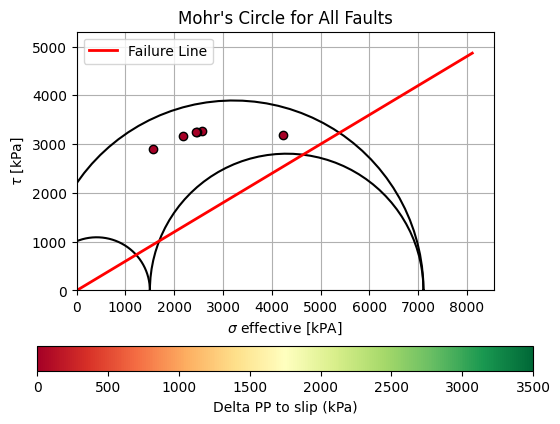


Fault 1:
Pore pressure to failure for fault (ppfail): -2895.873
Coulomb failure function (cff): 1737.524
Shear capacity utilization (scu): 2.132
Effective normal stress projected onto fault (sig_fault): 2558.882
Effective shear stress projected onto fault (tau_fault): 3272.853

Fault 2:
Pore pressure to failure for fault (ppfail): -2955.164
Coulomb failure function (cff): 1773.099
Shear capacity utilization (scu): 2.198
Effective normal stress projected onto fault (sig_fault): 2466.548
Effective shear stress projected onto fault (tau_fault): 3253.027

Fault 3:
Pore pressure to failure for fault (ppfail): -3111.281
Coulomb failure function (cff): 1866.769
Shear capacity utilization (scu): 2.430
Effective normal stress projected onto fault (sig_fault): 2175.945
Effective shear stress projected onto fault (tau_fault): 3172.336

Fault 4:
Pore pressure to failure for fault (ppfail): -2967.784
Coulomb failure function (cff): 1780.670
Shear capacity utilization (scu): 2.213
Effective normal 

-1056.8907180165443

In [6]:
# Call mohrs_3D_v2 function
mohrs_3D_v2(strike, dip, mu, SHmax_or, Pp, APhi, Sv_grad, SHmax_mag, Shmin_mag, ref_mu, name, plot=True, data=True)

5. Probabilistic Analysis Results

Running Monte Carlo for fault: Fault 1


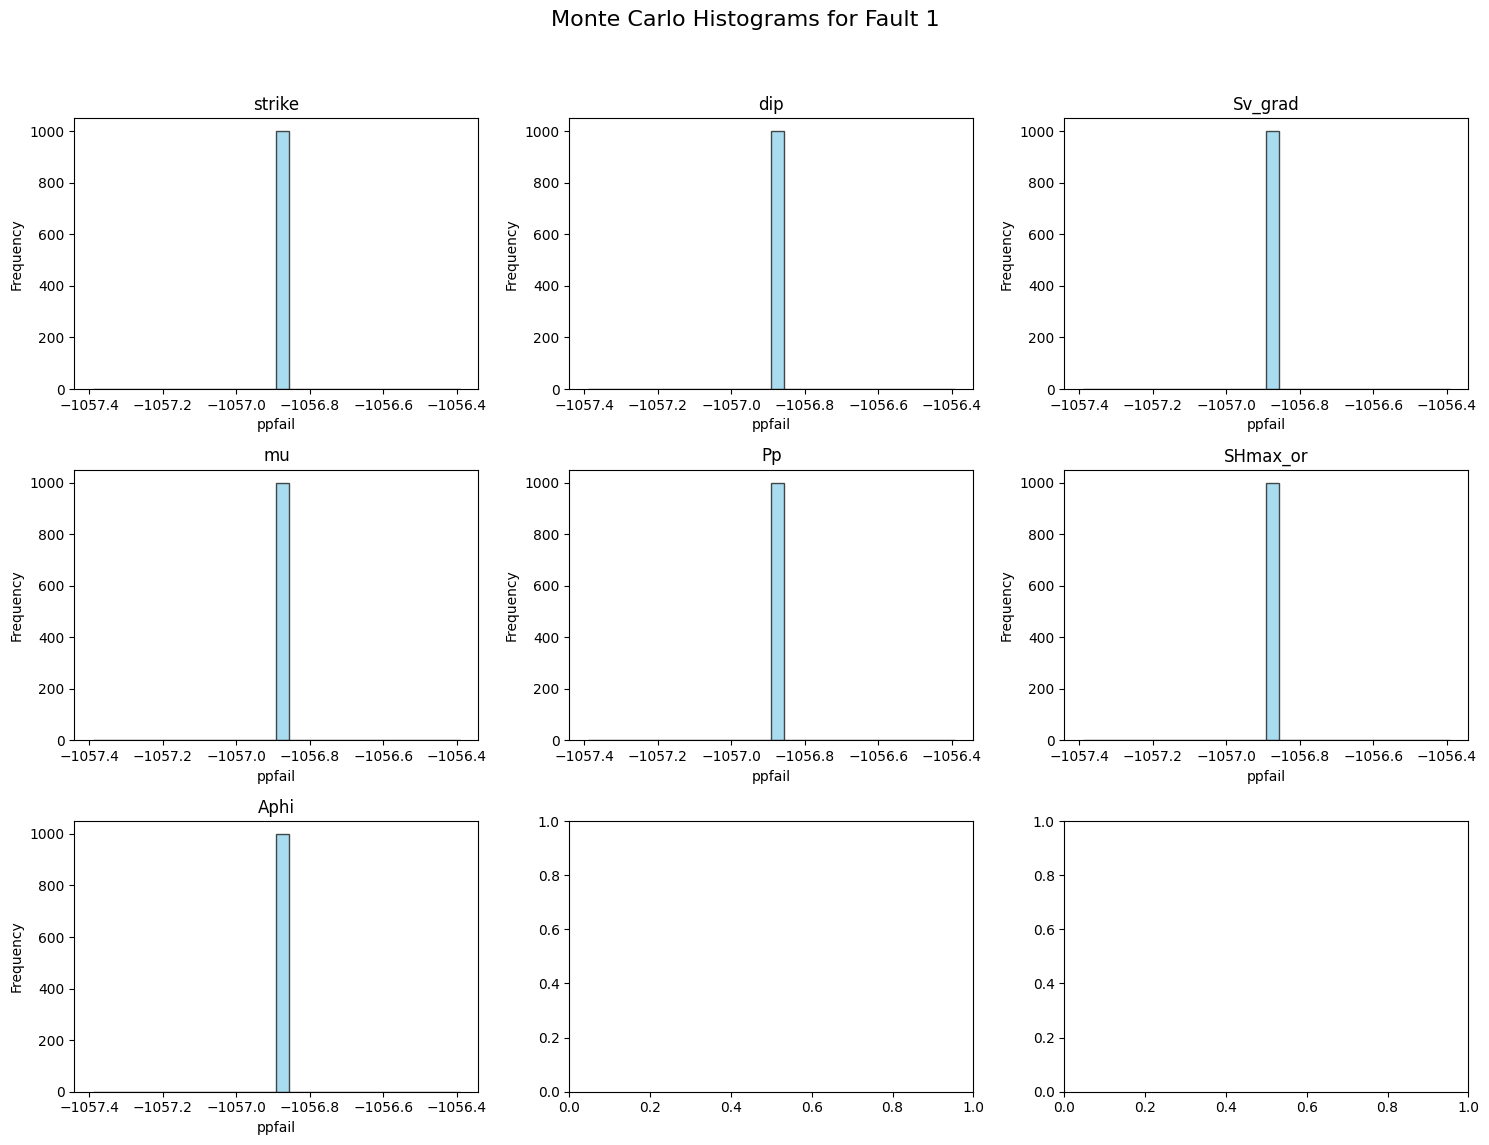

Running Monte Carlo for fault: Fault 2


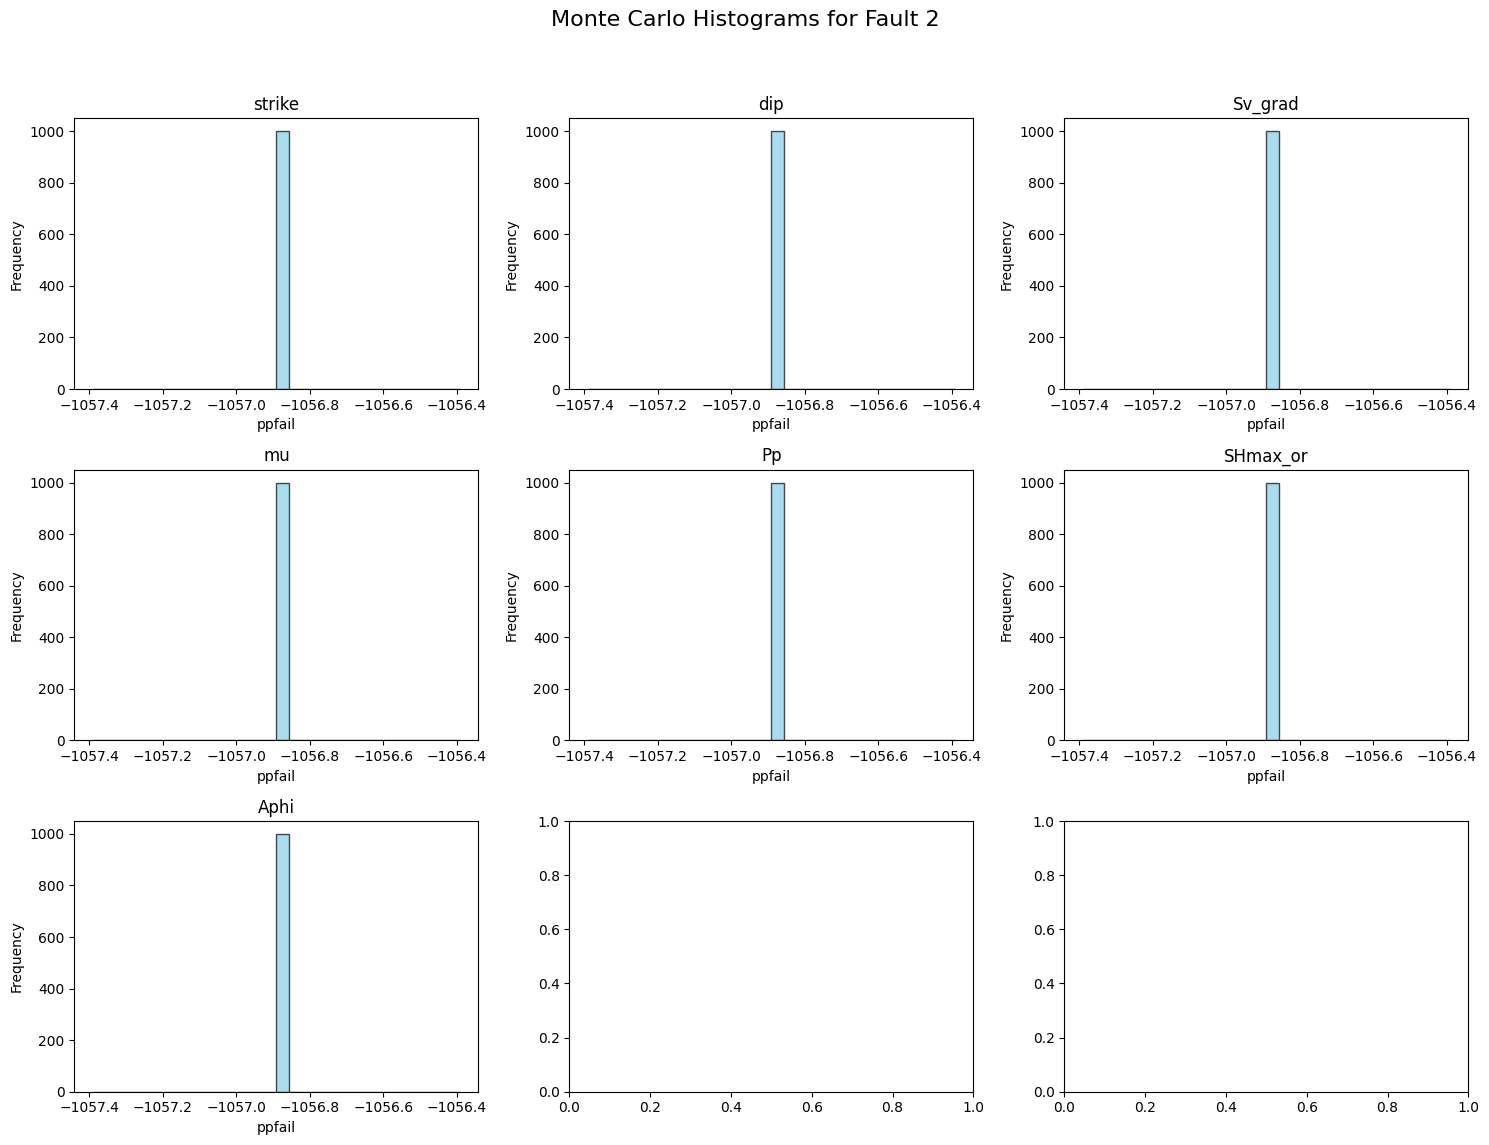

Running Monte Carlo for fault: Fault 3


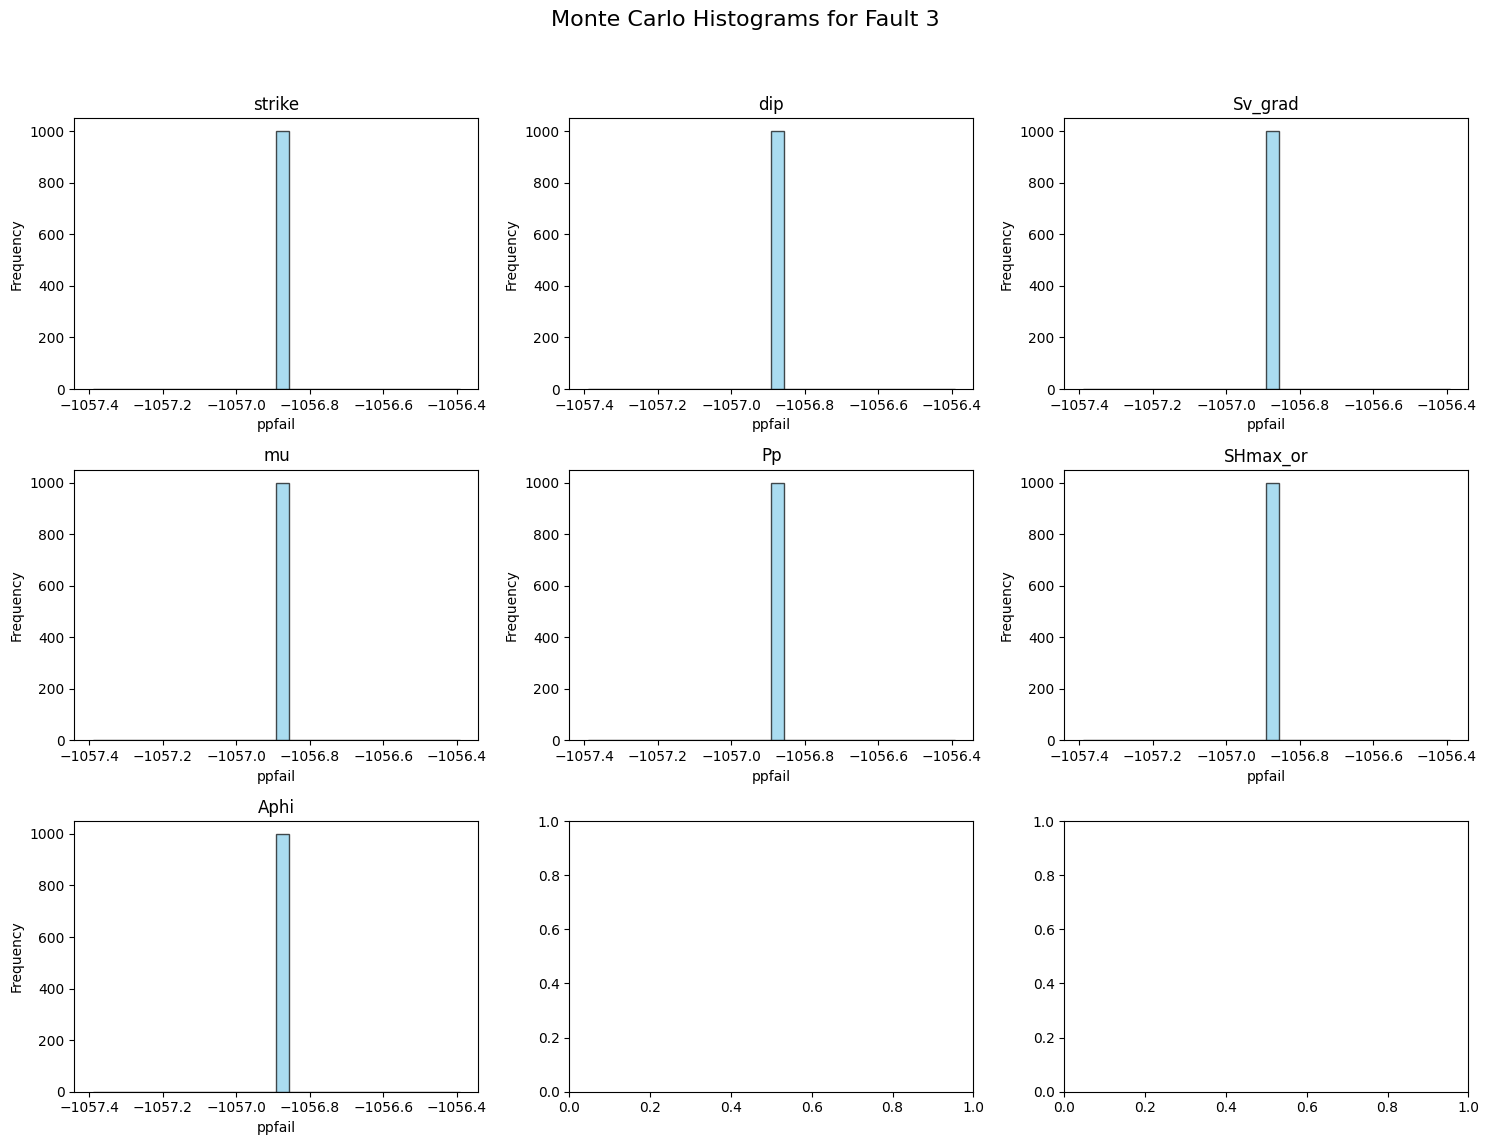

Running Monte Carlo for fault: Fault 4


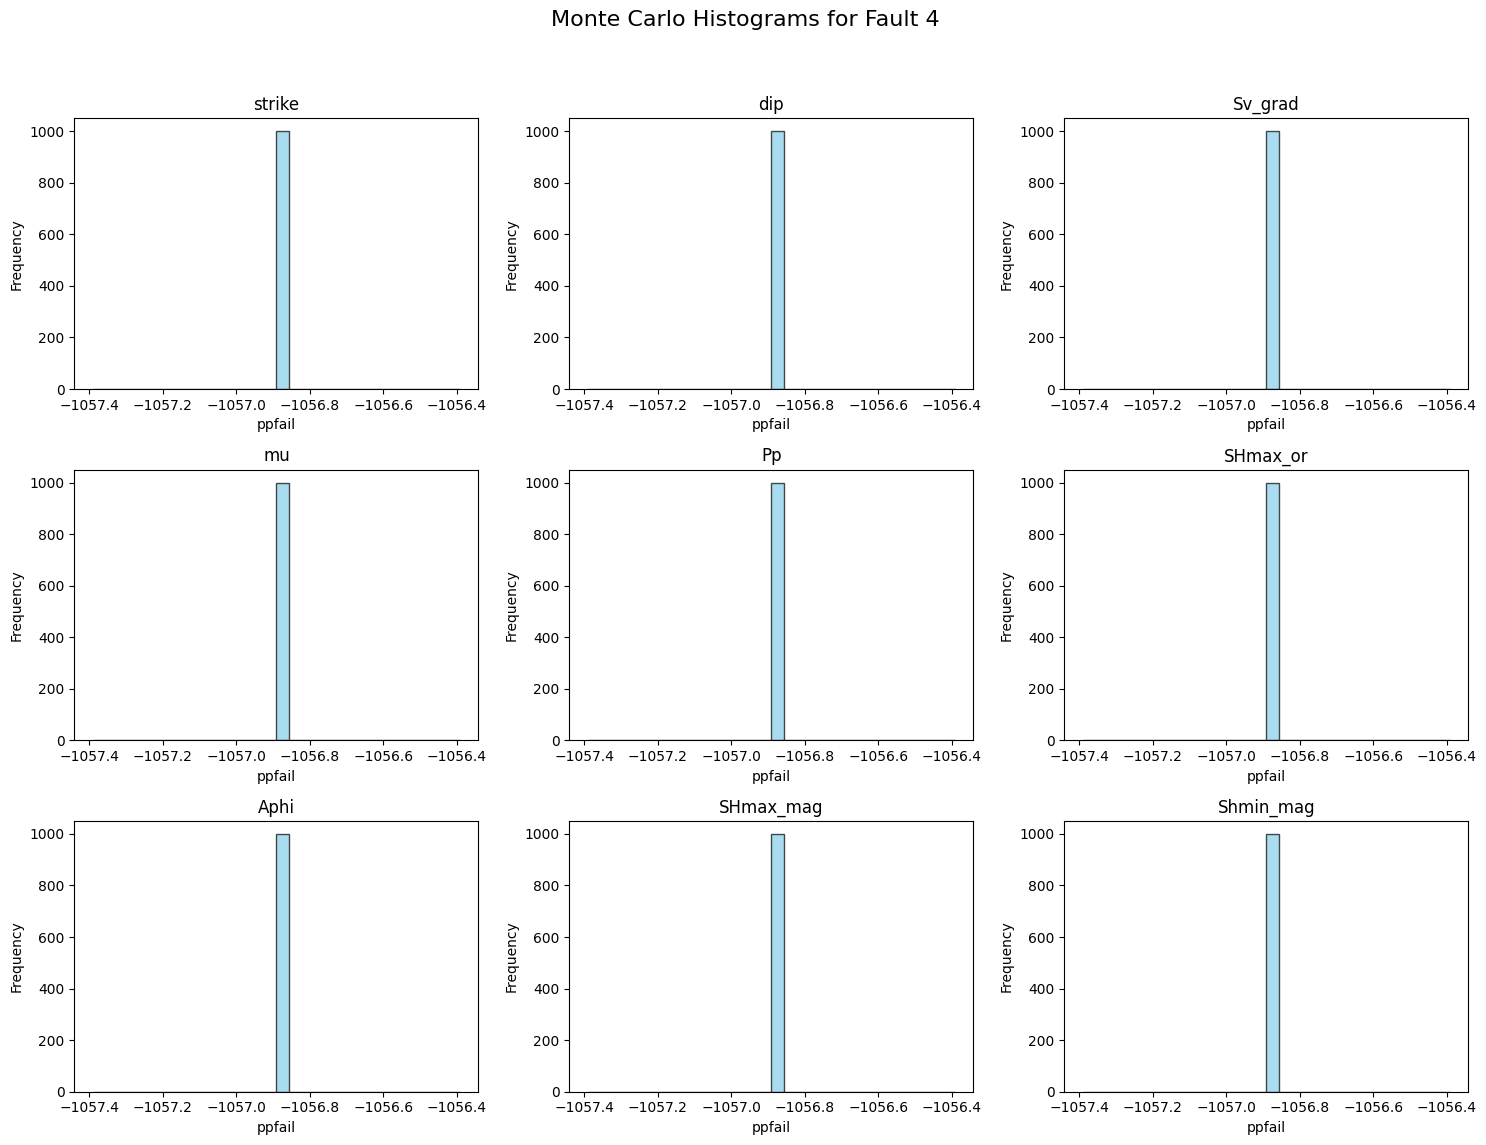

Running Monte Carlo for fault: Fault 5


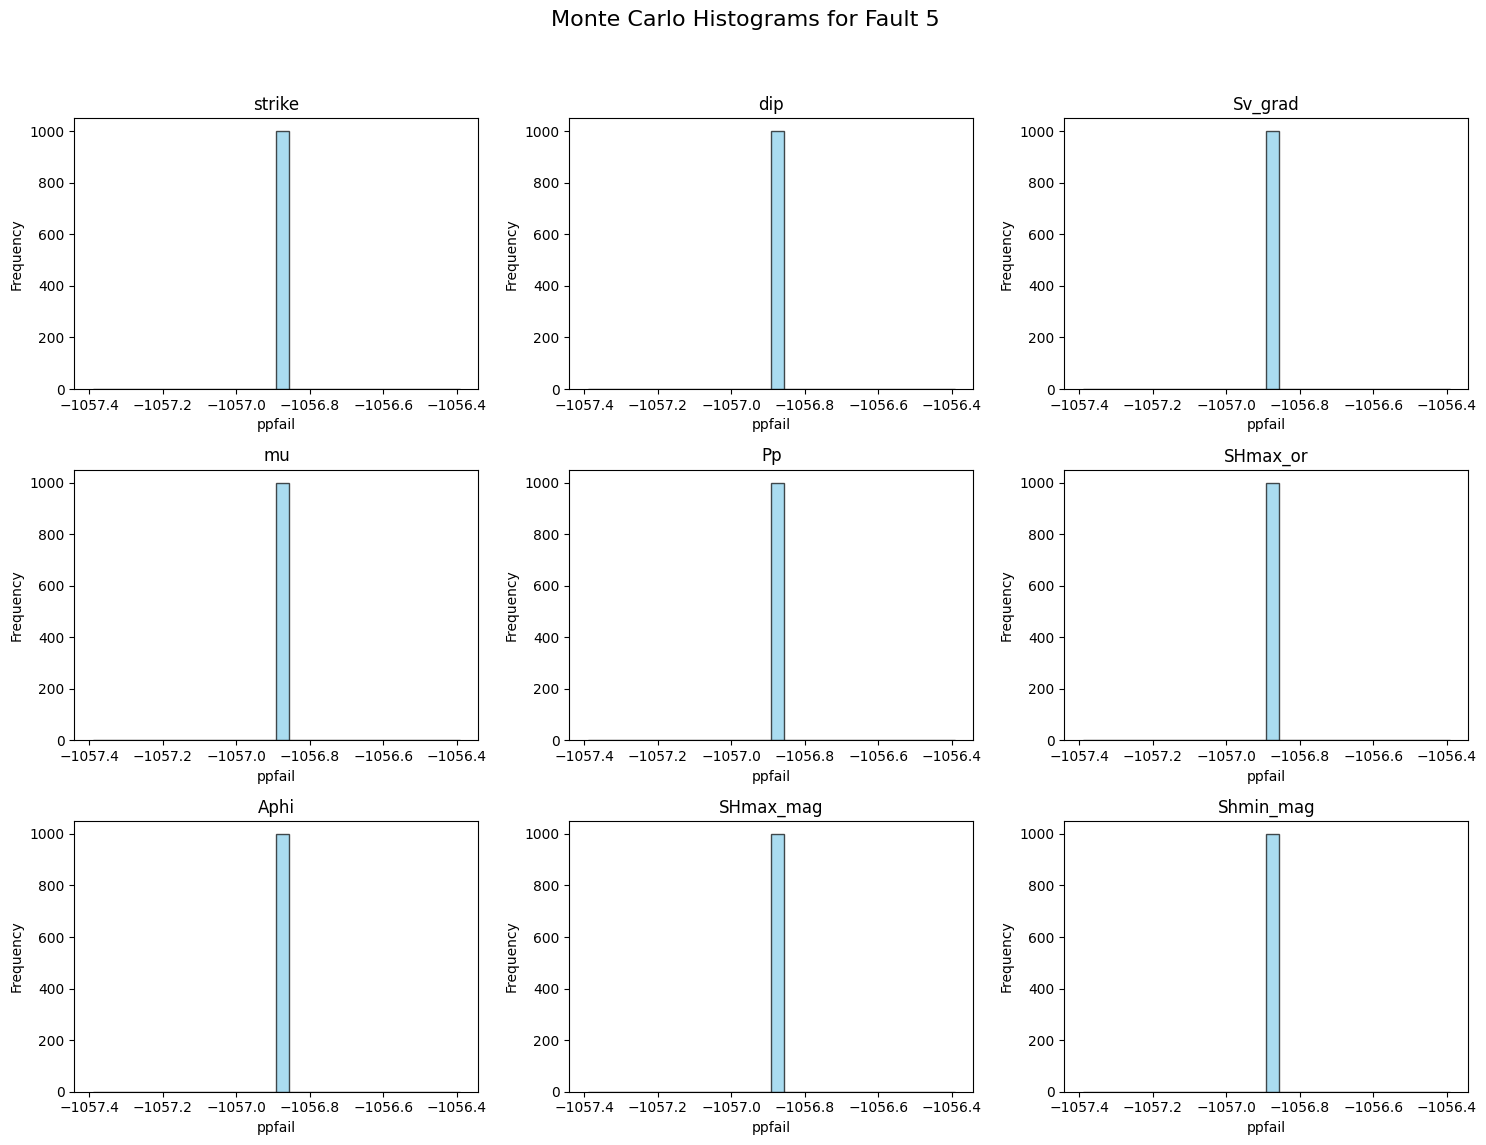

Running Monte Carlo for fault: Fault 6


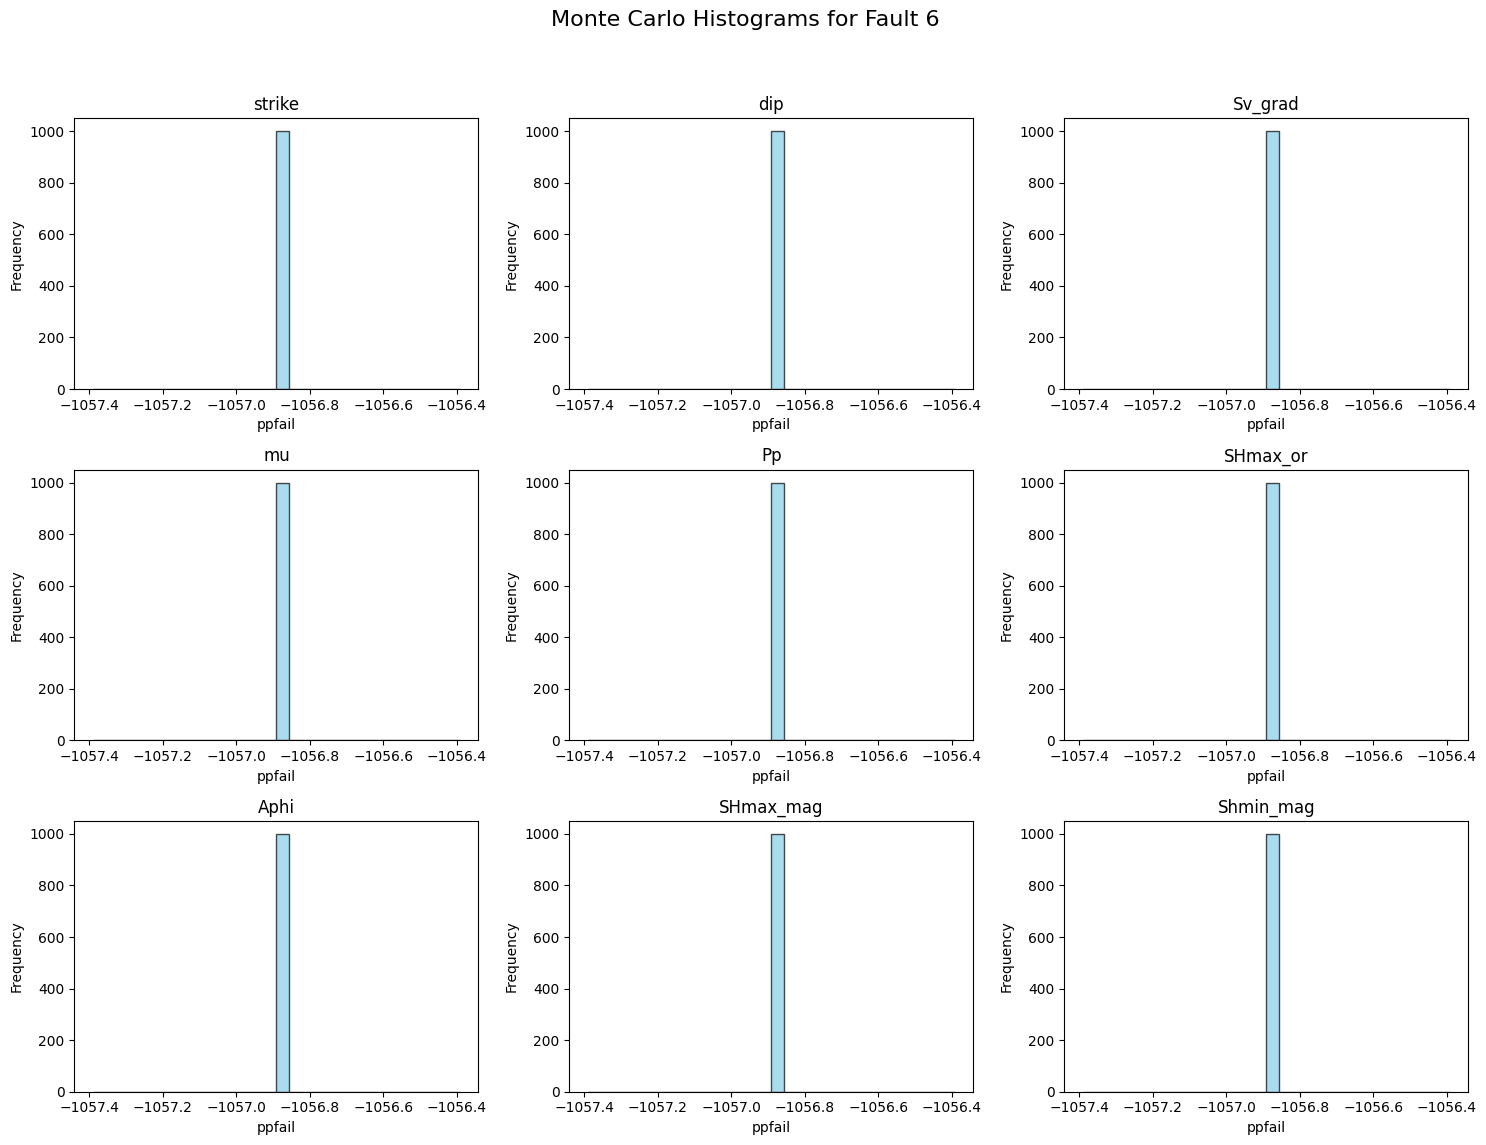

In [7]:
# Call ppfail_MC function
results = ppfail_MC_all(faults_df, strike, dip, mu, SHmax_or, Pp, APhi, Sv_grad, SHmax_mag, Shmin_mag, ref_mu, name, nruns=1000)